Este notebook consiste na análise exploratória de dados (EDA) referente ao dataset "Gas Prices in Brazil", extraído do Kaggle. O dataset abrange o período de 2004 até 2021 e tem como base os dados dos relatórios divulgados pela Agência Nacional do Petróleo, Gás Natural e Biocombustíveis (ANP). 

Traremos os seguintes insights através dos dados:

1. Como os preços dos produtos se comportaram ao longo dos anos?
2. Como diferentes regiões do Brasil viram os preços mudarem?
2. Qual é a mínima e máxima histórica de preço por produto por estado?

Tipos de Produtos:
* Etanol Hidratado
* Gás Natural Veicular (GNV)
* Gás Liquefeito de Petróleo (GLP) – Gás de Cozinha - Botijão de 13 quilos
* Gasolina Comum
* Gasolina Aditivada
* Óleo Diesel
* Óleo Diesel S-10 -> *Foi adicionado depois*

Observações importantes:
Até 30 de outubro de 2004, todos os preços médios eram calculados por média aritmética simples. Após esta data, os preços médios de revenda e de distribuição de combustíveis, em nível estadual, regional e nacional, passaram a ser ponderados com base nas informações de vendas enviadas pelas distribuidoras à ANP. Atualmente, apenas o preço médio em nível municipal é obtido por média aritmética simples. Portanto devemos analisar apenas os dados fornecidos a partir do dia 31/10/2004.
Os valores NULL foram substituídos pelo valor -99999 pelo responsável do dataset.

fonte: https://www.kaggle.com/datasets/matheusfreitag/gas-prices-in-brazil

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from cycler import cycler #plot diversas cores

## Pré Análise e Limpeza

In [2]:
#Abrindo a base de dados .csv
df_base= pd.read_csv('base_2004_2021.csv')

#Realizando uma rápida observação dos dados
df_base.head(10)

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.190,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.890,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.180,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.090,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.050,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082
5,2004-05-09,2004-05-15,NORDESTE,BAHIA,ETANOL HIDRATADO,408,R$/l,1.383,0.132,0.999,2.050,0.426,0.095,0.957,0.128,0.5686,1.35,0.134
6,2004-05-09,2004-05-15,NORDESTE,CEARA,ETANOL HIDRATADO,278,R$/l,1.453,0.218,1.030,1.950,0.353,0.150,1.1,0.068,0.7332,1.294,0.062
7,2004-05-09,2004-05-15,NORDESTE,MARANHAO,ETANOL HIDRATADO,105,R$/l,1.631,0.158,1.350,2.000,0.515,0.097,1.116,0.091,0.9923,1.36183,0.082
8,2004-05-09,2004-05-15,NORDESTE,PARAIBA,ETANOL HIDRATADO,125,R$/l,1.284,0.130,1.100,1.699,0.353,0.101,0.931,0.072,0.7577,1.2972,0.077
9,2004-05-09,2004-05-15,NORDESTE,PERNAMBUCO,ETANOL HIDRATADO,423,R$/l,1.224,0.141,0.989,1.700,0.277,0.115,0.947,0.091,0.5643,1.3541,0.096


In [3]:
#Analisando os tipos de variáveis das colunas e se elas possuem valores vazios
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   120823 non-null  object 
 1   DATA FINAL                     120823 non-null  object 
 2   REGIÃO                         120823 non-null  object 
 3   ESTADO                         120823 non-null  object 
 4   PRODUTO                        120823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 6   UNIDADE DE MEDIDA              120823 non-null  object 
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64
 11  MARGEM MÉDIA REVENDA           120823 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

Algumas colunas deveriam ser do tipo float, mas são do tipo object. Provavelmente devem ter valores nulos (-99999) e/ou demais caracteres que estão poluíndo a base. São estas colunas: "MARGEM MÉDIA REVENDA", "PREÇO MÉDIO DISTRIBUIÇÃO", "DESVIO PADRÃO DISTRIBUIÇÃO", "PREÇO MÍNIMO DISTRIBUIÇÃO", "PREÇO MÁXIMO DISTRIBUIÇÃO", "COEF DE VARIAÇÃO DISTRIBUIÇÃO".

In [4]:
#Realizando uma visualização geral dos dados em ordem crescente de valor para identificar os possíveis caracteres 
df_base.sort_values(by=['MARGEM MÉDIA REVENDA'])

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
40329,2009-04-12,2009-04-18,CENTRO OESTE,MATO GROSSO DO SUL,GNV,8,R$/m3,1.749,0.018,1.749,1.799,-,0.010,-,-,-,-,-
74045,2015-04-19,2015-04-25,SUL,PARANA,GNV,6,R$/m3,2.120,0.160,1.999,2.396,-,0.075,-,-,-,-,-
74050,2015-04-19,2015-04-25,SUL,SANTA CATARINA,GNV,43,R$/m3,2.101,0.125,1.960,2.630,-,0.059,-,-,-,-,-
74055,2015-04-26,2015-05-02,NORTE,AMAPA,ETANOL HIDRATADO,1,R$/l,3.100,0.000,3.100,3.100,-,0.000,-,-,-,-,-
11970,2012-12-02,2012-12-08,NORTE,AMAPA,ETANOL HIDRATADO,9,R$/l,2.286,0.080,2.180,2.450,-,0.035,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71730,2015-01-04,2015-01-10,CENTRO OESTE,MATO GROSSO,GLP,107,R$/13Kg,55.449,4.651,45.000,67.000,9.997,0.084,45.452,2.121,44,47,0.047
81778,2016-04-17,2016-04-23,NORDESTE,PARAIBA,GLP,81,R$/13Kg,51.239,3.621,42.000,55.000,9.997,0.071,41.242,4.832,33.59,47,0.117
32246,2010-03-07,2010-03-13,NORTE,TOCANTINS,GLP,73,R$/13Kg,44.264,1.417,40.000,48.000,9.999,0.032,34.265,1.821,30,38.7,0.053
34752,2011-12-18,2011-12-24,NORTE,AMAPA,GLP,26,R$/13Kg,43.366,4.047,40.000,58.000,9.999,0.093,33.367,0.153,33.2,33.5,0.005


In [5]:
#Realizando uma visualização geral dos dados
df_base.tail(5)

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
120818,2021-04-25,2021-05-01,NORTE,RORAIMA,OLEO DIESEL S10,12,R$/l,4.582,0.056,4.510,4.690,-99999.0,0.012,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120819,2021-04-25,2021-05-01,SUL,SANTA CATARINA,OLEO DIESEL S10,100,R$/l,4.141,0.187,3.838,4.739,-99999.0,0.045,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120820,2021-04-25,2021-05-01,SUDESTE,SAO PAULO,OLEO DIESEL S10,886,R$/l,4.246,0.216,3.769,5.199,-99999.0,0.051,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120821,2021-04-25,2021-05-01,NORDESTE,SERGIPE,OLEO DIESEL S10,33,R$/l,4.464,0.205,4.190,4.699,-99999.0,0.046,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120822,2021-04-25,2021-05-01,NORTE,TOCANTINS,OLEO DIESEL S10,18,R$/l,4.352,0.156,4.199,4.699,-99999.0,0.036,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0


Deste modo temos o -99999 e o "-" poluindo a base. Vamos alterá-los para Nulos e assim visualizar a quantidade:

In [6]:
#Copiando o df_base para um novo df por segurança
df=df_base.copy()

#Substituindo os valores poluentes por NaN (Not A Number)
df=df.replace({'-99999.0': np.NaN, '-99999': np.NaN, '-': np.NaN})

In [7]:
#Analisando os tipos de variáveis das colunas e se elas possuem valores vazios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   120823 non-null  object 
 1   DATA FINAL                     120823 non-null  object 
 2   REGIÃO                         120823 non-null  object 
 3   ESTADO                         120823 non-null  object 
 4   PRODUTO                        120823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 6   UNIDADE DE MEDIDA              120823 non-null  object 
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64
 11  MARGEM MÉDIA REVENDA           111875 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

In [8]:
#Contando a quantidade de vazios 
df.isnull().sum()

DATA INICIAL                        0
DATA FINAL                          0
REGIÃO                              0
ESTADO                              0
PRODUTO                             0
NÚMERO DE POSTOS PESQUISADOS        0
UNIDADE DE MEDIDA                   0
PREÇO MÉDIO REVENDA                 0
DESVIO PADRÃO REVENDA               0
PREÇO MÍNIMO REVENDA                0
PREÇO MÁXIMO REVENDA                0
MARGEM MÉDIA REVENDA             8948
COEF DE VARIAÇÃO REVENDA            0
PREÇO MÉDIO DISTRIBUIÇÃO         8908
DESVIO PADRÃO DISTRIBUIÇÃO       8908
PREÇO MÍNIMO DISTRIBUIÇÃO        8908
PREÇO MÁXIMO DISTRIBUIÇÃO        8908
COEF DE VARIAÇÃO DISTRIBUIÇÃO    8908
dtype: int64

In [9]:
#Vendo a % que os vazios representam no dataset 
print(f'Representação de vazios no dataset: {np.round((8948/np.shape(df)[0])*100,2)} %')

Representação de vazios no dataset: 7.41 %


Agora temos o valor real de valores nulos no nosso dataset e podemos comparar em relação a nossa quantidade total de dados do dataset. Como a MARGEM MÉDIA REVENDA possui valores a mais nulos que as demais colunas com valores nulos, utilizamos ela como referência. Os valores nulos representam apenas 7,41 % dos dados em relação ao nosso dataset, que possui 120.823 no total. Porém se excluirmos eles, perdemos os dados de 2021 (percebemos isto na parte dos plots e voltamos para este passo para reajustar). Portanto iremos substituir pela mediana os valores vazios.

In [10]:
#Passando as colunas para valores numéricos após a exclusão dos vazios
df['MARGEM MÉDIA REVENDA']=pd.to_numeric(df['MARGEM MÉDIA REVENDA'])
df['PREÇO MÉDIO DISTRIBUIÇÃO']=pd.to_numeric(df['PREÇO MÉDIO DISTRIBUIÇÃO'])
df['PREÇO MÍNIMO DISTRIBUIÇÃO']=pd.to_numeric(df['PREÇO MÍNIMO DISTRIBUIÇÃO'])
df['PREÇO MÁXIMO DISTRIBUIÇÃO']=pd.to_numeric(df['PREÇO MÁXIMO DISTRIBUIÇÃO'])
df['DESVIO PADRÃO DISTRIBUIÇÃO']=pd.to_numeric(df['DESVIO PADRÃO DISTRIBUIÇÃO'])
df['COEF DE VARIAÇÃO DISTRIBUIÇÃO']=pd.to_numeric(df['COEF DE VARIAÇÃO DISTRIBUIÇÃO'])

In [11]:
#Substituindo os valores vazios pela mediana
df["MARGEM MÉDIA REVENDA"].fillna(df["MARGEM MÉDIA REVENDA"].mean(), inplace=True)
df["PREÇO MÉDIO DISTRIBUIÇÃO"].fillna(df["PREÇO MÉDIO DISTRIBUIÇÃO"].mean(),inplace=True)
df["DESVIO PADRÃO DISTRIBUIÇÃO"].fillna(df["DESVIO PADRÃO DISTRIBUIÇÃO"].mean(),inplace=True)
df["PREÇO MÍNIMO DISTRIBUIÇÃO"].fillna(df["PREÇO MÍNIMO DISTRIBUIÇÃO"].mean(),inplace=True)
df["PREÇO MÁXIMO DISTRIBUIÇÃO"].fillna(df["PREÇO MÁXIMO DISTRIBUIÇÃO"].mean(),inplace=True)
df["COEF DE VARIAÇÃO DISTRIBUIÇÃO"].fillna(df["COEF DE VARIAÇÃO DISTRIBUIÇÃO"].mean(),inplace=True)

In [12]:
#Pegando todos os índices vazios, utilizando como referência a coluna 'MARGEM MÉDIA REVENDA' por ter o maior número de valores vazios.
#indices=df[df['MARGEM MÉDIA REVENDA'].isna()].index.tolist()

#Excluíndo os vazios do dataset utilizando os índices do passo anterior
#df=df.drop(indices, axis=0)

In [13]:
#Analisando se todas as colunas possuem o mesmo tamanho após a substituição dos vazios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   120823 non-null  object 
 1   DATA FINAL                     120823 non-null  object 
 2   REGIÃO                         120823 non-null  object 
 3   ESTADO                         120823 non-null  object 
 4   PRODUTO                        120823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 6   UNIDADE DE MEDIDA              120823 non-null  object 
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64
 11  MARGEM MÉDIA REVENDA           120823 non-null  float64
 12  COEF DE VARIAÇÃO REVENDA      

In [14]:
#Verificando se ainda há valores nulos
df.isnull().sum()

DATA INICIAL                     0
DATA FINAL                       0
REGIÃO                           0
ESTADO                           0
PRODUTO                          0
NÚMERO DE POSTOS PESQUISADOS     0
UNIDADE DE MEDIDA                0
PREÇO MÉDIO REVENDA              0
DESVIO PADRÃO REVENDA            0
PREÇO MÍNIMO REVENDA             0
PREÇO MÁXIMO REVENDA             0
MARGEM MÉDIA REVENDA             0
COEF DE VARIAÇÃO REVENDA         0
PREÇO MÉDIO DISTRIBUIÇÃO         0
DESVIO PADRÃO DISTRIBUIÇÃO       0
PREÇO MÍNIMO DISTRIBUIÇÃO        0
PREÇO MÁXIMO DISTRIBUIÇÃO        0
COEF DE VARIAÇÃO DISTRIBUIÇÃO    0
dtype: int64

Agora podemos transformar as colunas "MARGEM MÉDIA REVENDA", "PREÇO MÉDIO DISTRIBUIÇÃO", "DESVIO PADRÃO DISTRIBUIÇÃO", "PREÇO MÍNIMO DISTRIBUIÇÃO", "PREÇO MÁXIMO DISTRIBUIÇÃO", "COEF DE VARIAÇÃO DISTRIBUIÇÃO" para valores numéricos.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   120823 non-null  object 
 1   DATA FINAL                     120823 non-null  object 
 2   REGIÃO                         120823 non-null  object 
 3   ESTADO                         120823 non-null  object 
 4   PRODUTO                        120823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 6   UNIDADE DE MEDIDA              120823 non-null  object 
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64
 11  MARGEM MÉDIA REVENDA           120823 non-null  float64
 12  COEF DE VARIAÇÃO REVENDA      

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   120823 non-null  object 
 1   DATA FINAL                     120823 non-null  object 
 2   REGIÃO                         120823 non-null  object 
 3   ESTADO                         120823 non-null  object 
 4   PRODUTO                        120823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 6   UNIDADE DE MEDIDA              120823 non-null  object 
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64
 11  MARGEM MÉDIA REVENDA           120823 non-null  float64
 12  COEF DE VARIAÇÃO REVENDA      

Agora que limpamos a nossa base, ficando com 120.823  dados, falta apenas filtrarmos os dados a partir do dia 31/10/2004 para considerarmos apenas a média aritmética ponderada, conforme explicado na introdução deste notebook.

In [17]:
df['DATA INICIAL'] = pd.to_datetime(df['DATA INICIAL'], format='%Y-%m-%d')

df=df.loc[(df['DATA INICIAL']>'2004-10-30')]
df.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
675,2004-10-31,2004-11-06,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,146,R$/l,1.632,0.088,1.27,1.850,0.392,0.054,1.240,0.127,0.90510,1.6527,0.102
676,2004-10-31,2004-11-06,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,378,R$/l,1.412,0.123,1.20,1.799,0.311,0.087,1.101,0.091,0.87301,1.4579,0.083
677,2004-10-31,2004-11-06,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,195,R$/l,1.692,0.091,1.45,1.890,0.397,0.054,1.295,0.077,1.05000,1.6271,0.059
678,2004-10-31,2004-11-06,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,172,R$/l,1.626,0.066,1.37,1.785,0.403,0.041,1.223,0.114,0.94670,1.4600,0.093
679,2004-10-31,2004-11-06,NORDESTE,ALAGOAS,ETANOL HIDRATADO,98,R$/l,1.479,0.053,1.36,1.630,0.177,0.036,1.302,0.077,1.05020,1.4047,0.059


Para finalizarmos esta parte, falta apenas desmembrar as colunas de datas para facilitar o plot de gráficos.

In [18]:
#Analisando a data, seria interessante trabalhar com o dia, mês e ano em colunas separadas para facilitar a análise e plot.

#Novas colunas com o dia, mês e ano baseadas na coluna "DATA INICIAL" e "DATA FINAL"
dia_inicial=pd.DatetimeIndex(df['DATA INICIAL']).day
dia_final=pd.DatetimeIndex(df['DATA FINAL']).day

mes_inicial=pd.DatetimeIndex(df['DATA INICIAL']).month
mes_final=pd.DatetimeIndex(df['DATA FINAL']).month

ano_inicial=pd.DatetimeIndex(df['DATA INICIAL']).year
ano_final=pd.DatetimeIndex(df['DATA FINAL']).year

#Adicionando as colunas no DataFrame
df=df.assign(dia_inicial=dia_inicial, mes_inicial=mes_inicial, ano_inicial=ano_inicial, dia_final=dia_final, mes_final=mes_final, ano_final=ano_final)

Agora vamos verificar se os produtos estão com os nomes corretos

In [19]:
df['PRODUTO'].value_counts()

PRODUTO
GASOLINA COMUM        22895
GLP                   22886
ETANOL HIDRATADO      22765
ÓLEO DIESEL           20519
GNV                   14080
ÓLEO DIESEL S10        9113
OLEO DIESEL S10        2376
OLEO DIESEL            2351
GASOLINA ADITIVADA      749
Name: count, dtype: int64

Temos o Óleo Diesel com duas variações, tanto para o Óleo Diesel quanto para o ÓLEO DIESEL S10. Vamos ajustar isto. 

In [20]:
df=df.replace('OLEO DIESEL S10', 'ÓLEO DIESEL S10')
df=df.replace('OLEO DIESEL', 'ÓLEO DIESEL')

In [21]:
df['PRODUTO'].value_counts()

PRODUTO
GASOLINA COMUM        22895
GLP                   22886
ÓLEO DIESEL           22870
ETANOL HIDRATADO      22765
GNV                   14080
ÓLEO DIESEL S10       11489
GASOLINA ADITIVADA      749
Name: count, dtype: int64

In [22]:
#Verificando o tamanho final do nosso dataset após a limpeza
df.shape

(117734, 24)

Ao final da limpeza e demais manipulações, finalizamos esta etapa com 108.801 linhas e 24 colunas.

## Análise dos dados

### Distribuição de dados por Região, Estado e Produto

In [23]:
#Verificando as colunas existentes no dataset
df.columns

Index(['DATA INICIAL', 'DATA FINAL', 'REGIÃO', 'ESTADO', 'PRODUTO',
       'NÚMERO DE POSTOS PESQUISADOS', 'UNIDADE DE MEDIDA',
       'PREÇO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA', 'PREÇO MÍNIMO REVENDA',
       'PREÇO MÁXIMO REVENDA', 'MARGEM MÉDIA REVENDA',
       'COEF DE VARIAÇÃO REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO',
       'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO',
       'PREÇO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO',
       'dia_inicial', 'mes_inicial', 'ano_inicial', 'dia_final', 'mes_final',
       'ano_final'],
      dtype='object')

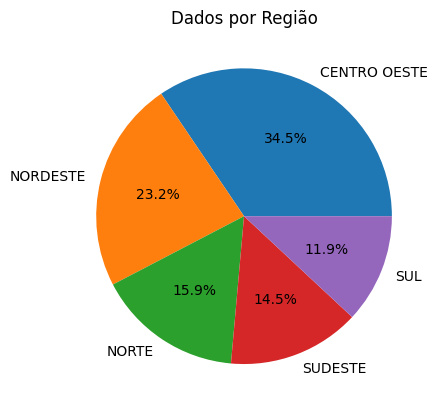

In [24]:
#Dados por Região
regiao=np.unique(df['REGIÃO'])

fig, ax = plt.subplots()
ax.pie(df['REGIÃO'].value_counts(), labels=regiao, autopct='%1.1f%%')
plt.title("Dados por Região")
plt.show()

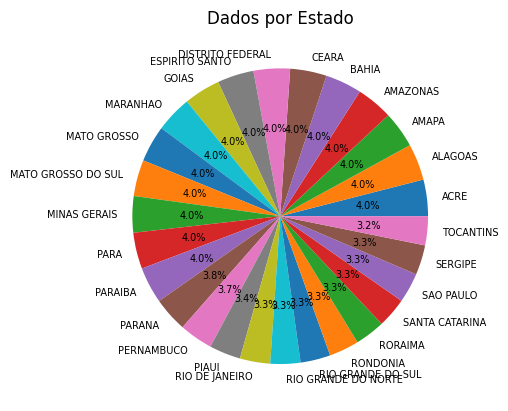

In [25]:
#Dados por Estado
estado=np.unique(df['ESTADO'])

fig, ax = plt.subplots()
ax.pie(df['ESTADO'].value_counts(), labels=estado, textprops={'fontsize':7}, autopct='%1.1f%%')
plt.title("Dados por Estado")
plt.show()

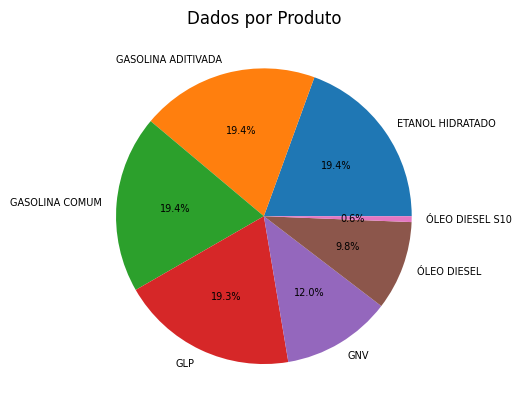

In [26]:
#Dados por Produto
produto=np.unique(df['PRODUTO'])

fig, ax = plt.subplots()
ax.pie(df['PRODUTO'].value_counts(), labels=produto, textprops={'fontsize':7}, autopct='%1.1f%%')
plt.title("Dados por Produto")
plt.show()

Agora vamos verificar a unidade de medida destes produtos

In [27]:
#Verificando a unidade de medida destes produtos
df.groupby(['UNIDADE DE MEDIDA','PRODUTO'])['PRODUTO'].value_counts()

UNIDADE DE MEDIDA  PRODUTO           
R$/13Kg            GLP                   22886
R$/l               ETANOL HIDRATADO      22765
                   GASOLINA ADITIVADA      749
                   GASOLINA COMUM        22895
                   ÓLEO DIESEL           22870
                   ÓLEO DIESEL S10       11489
R$/m3              GNV                   14080
Name: count, dtype: int64

### ADIOCIONAR NOME DA SESSÃO

In [28]:
#Preço Médio de Revenda por Produto
#produto=np.unique(df['PRODUTO'])

#y=df.groupby('PRODUTO')['PREÇO MÉDIO REVENDA'].mean()
#unidades=[produto[0]+'-R$/l',produto[1]+'-R$/l',produto[2]+'-R$/13Kg',produto[3]+'-R$/m3',produto[4]+'-R$/l',produto[5]+'-R$/l']

#plt.barh(produto, y, color='orange')
#plt.yticks([0,1,2,3,4,5],unidades)
#plt.title('Preço Médio de Revenda por Produto')
#plt.show()

C:\Users\manus\AppData\Local\Temp\ipykernel_14284\4255195210.py:35: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


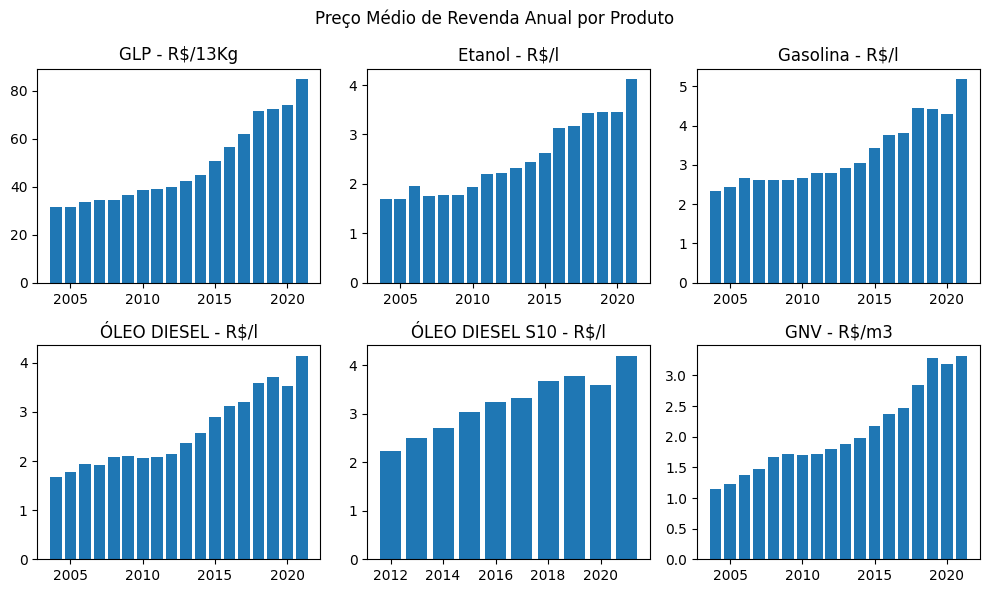

In [29]:
#Preço Médio de Revenda Anual por Produto - Plot 
glp=df.loc[df['PRODUTO'] == 'GLP']     
etanol=df.loc[df['PRODUTO'] == 'ETANOL HIDRATADO']        
gasolina=df.loc[df['PRODUTO'] == 'GASOLINA COMUM']
diesel=df.loc[df['PRODUTO'] == 'ÓLEO DIESEL']
diesels10=df.loc[df['PRODUTO'] == 'ÓLEO DIESEL S10']
gnv=df.loc[df['PRODUTO'] == 'GNV']


anos=np.unique(df['ano_inicial'])
#s10 precisa de outro xlabel porque começou a ser vendida em 2012
anos_ds10=np.unique(diesels10['ano_inicial'])

fig, axs = plt.subplots(2, 3, figsize=(10, 6), layout='constrained')
fig.suptitle('Preço Médio de Revenda Anual por Produto')

axs[0,0].bar(anos,glp.groupby('ano_inicial')['PREÇO MÉDIO REVENDA'].mean())
axs[0,0].set_title('GLP - R$/13Kg')

axs[0, 1].bar(anos,etanol.groupby('ano_inicial')['PREÇO MÉDIO REVENDA'].mean())
axs[0, 1].set_title('Etanol - R$/l')

axs[0, 2].bar(anos,gasolina.groupby('ano_inicial')['PREÇO MÉDIO REVENDA'].mean())
axs[0, 2].set_title('Gasolina - R$/l')

axs[1, 0].bar(anos,diesel.groupby('ano_inicial')['PREÇO MÉDIO REVENDA'].mean())
axs[1, 0].set_title('ÓLEO DIESEL - R$/l')

axs[1, 1].bar(anos_ds10,diesels10.groupby('ano_inicial')['PREÇO MÉDIO REVENDA'].mean())
axs[1, 1].set_title('ÓLEO DIESEL S10 - R$/l')

axs[1, 2].bar(anos,gnv.groupby('ano_inicial')['PREÇO MÉDIO REVENDA'].mean())
axs[1, 2].set_title('GNV - R$/m3')

plt.tight_layout()
plt.show()

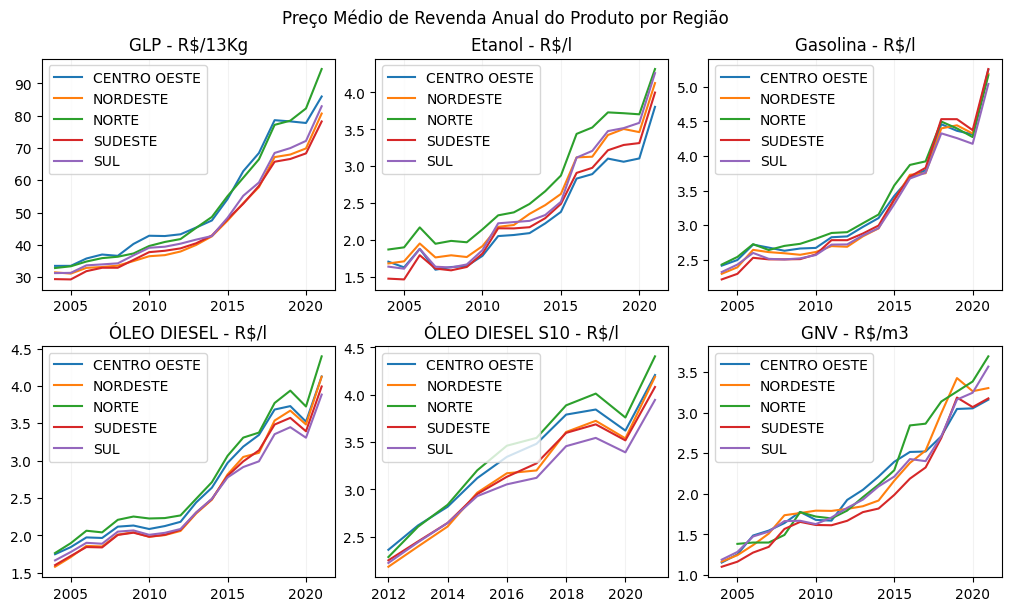

In [30]:
#Preço Médio de Revenda Anual do Produto por Região
regioes=np.unique(df['REGIÃO'])

fig, axs = plt.subplots(2, 3, figsize=(10, 6), layout='constrained')
fig.suptitle('Preço Médio de Revenda Anual do Produto por Região')

axs[0,0].plot(glp.groupby(['REGIÃO','ano_inicial'])['PREÇO MÉDIO REVENDA'].mean().unstack(level=0), label=regioes)
axs[0,0].set_title('GLP - R$/13Kg')
axs[0,0].legend(loc='upper left')
axs[0,0].grid(axis='x', color='0.95')

axs[0, 1].plot(etanol.groupby(['REGIÃO','ano_inicial'])['PREÇO MÉDIO REVENDA'].mean().unstack(level=0), label=regioes)
axs[0, 1].set_title('Etanol - R$/l')
axs[0, 1].legend(loc='upper left')
axs[0, 1].grid(axis='x', color='0.95')

axs[0, 2].plot(gasolina.groupby(['REGIÃO','ano_inicial'])['PREÇO MÉDIO REVENDA'].mean().unstack(level=0), label=regioes)
axs[0, 2].set_title('Gasolina - R$/l')
axs[0, 2].legend(loc='upper left')
axs[0, 2].grid(axis='x', color='0.95')

axs[1, 0].plot(diesel.groupby(['REGIÃO','ano_inicial'])['PREÇO MÉDIO REVENDA'].mean().unstack(level=0), label=regioes)
axs[1, 0].set_title('ÓLEO DIESEL - R$/l')
axs[1, 0].legend(loc='upper left')
axs[1, 0].grid(axis='x', color='0.95')

axs[1, 1].plot(diesels10.groupby(['REGIÃO','ano_inicial'])['PREÇO MÉDIO REVENDA'].mean().unstack(level=0), label=regioes)
axs[1, 1].set_title('ÓLEO DIESEL S10 - R$/l')
axs[1, 1].legend(loc='upper left')
axs[1, 1].grid(axis='x', color='0.95')

axs[1, 2].plot(gnv.groupby(['REGIÃO','ano_inicial'])['PREÇO MÉDIO REVENDA'].mean().unstack(level=0), label=regioes)
axs[1, 2].set_title('GNV - R$/m3')
axs[1, 2].legend(loc='upper left')
axs[1, 2].grid(axis='x', color='0.95')



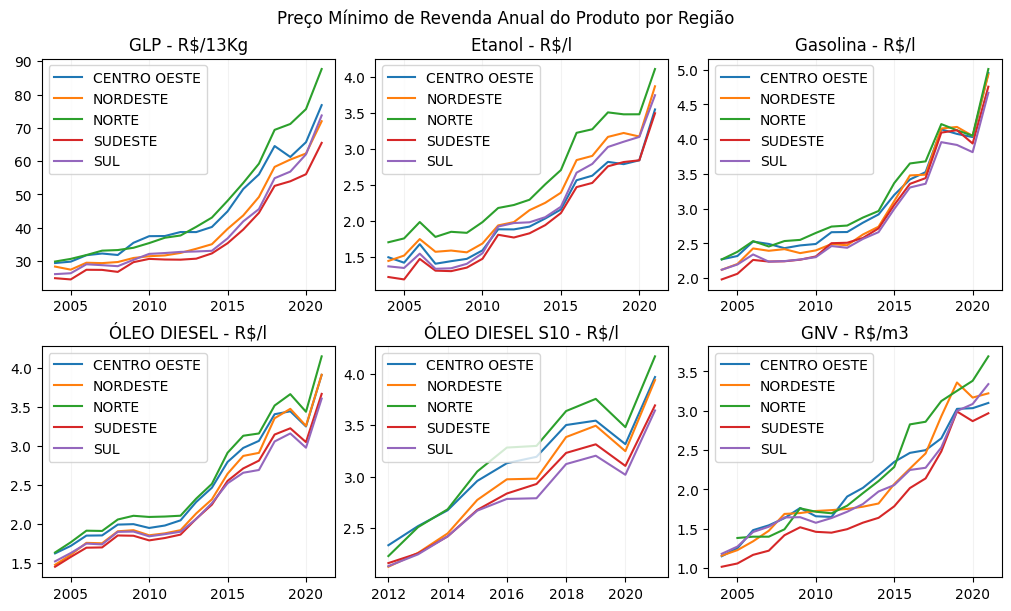

In [31]:
#Preço Mínimo de Revenda Anual do Produto por Região
regioes=np.unique(df['REGIÃO'])

fig, axs = plt.subplots(2, 3, figsize=(10, 6), layout='constrained')
fig.suptitle('Preço Mínimo de Revenda Anual do Produto por Região')

axs[0,0].plot(glp.groupby(['REGIÃO','ano_inicial'])['PREÇO MÍNIMO REVENDA'].mean().unstack(level=0), label=regioes)
axs[0,0].set_title('GLP - R$/13Kg')
axs[0,0].legend(loc='upper left')
axs[0,0].grid(axis='x', color='0.95')

axs[0, 1].plot(etanol.groupby(['REGIÃO','ano_inicial'])['PREÇO MÍNIMO REVENDA'].mean().unstack(level=0), label=regioes)
axs[0, 1].set_title('Etanol - R$/l')
axs[0, 1].legend(loc='upper left')
axs[0, 1].grid(axis='x', color='0.95')

axs[0, 2].plot(gasolina.groupby(['REGIÃO','ano_inicial'])['PREÇO MÍNIMO REVENDA'].mean().unstack(level=0), label=regioes)
axs[0, 2].set_title('Gasolina - R$/l')
axs[0, 2].legend(loc='upper left')
axs[0, 2].grid(axis='x', color='0.95')

axs[1, 0].plot(diesel.groupby(['REGIÃO','ano_inicial'])['PREÇO MÍNIMO REVENDA'].mean().unstack(level=0), label=regioes)
axs[1, 0].set_title('ÓLEO DIESEL - R$/l')
axs[1, 0].legend(loc='upper left')
axs[1, 0].grid(axis='x', color='0.95')

axs[1, 1].plot(diesels10.groupby(['REGIÃO','ano_inicial'])['PREÇO MÍNIMO REVENDA'].mean().unstack(level=0), label=regioes)
axs[1, 1].set_title('ÓLEO DIESEL S10 - R$/l')
axs[1, 1].legend(loc='upper left')
axs[1, 1].grid(axis='x', color='0.95')

axs[1, 2].plot(gnv.groupby(['REGIÃO','ano_inicial'])['PREÇO MÍNIMO REVENDA'].mean().unstack(level=0), label=regioes)
axs[1, 2].set_title('GNV - R$/m3')
axs[1, 2].legend(loc='upper left')
axs[1, 2].grid(axis='x', color='0.95')

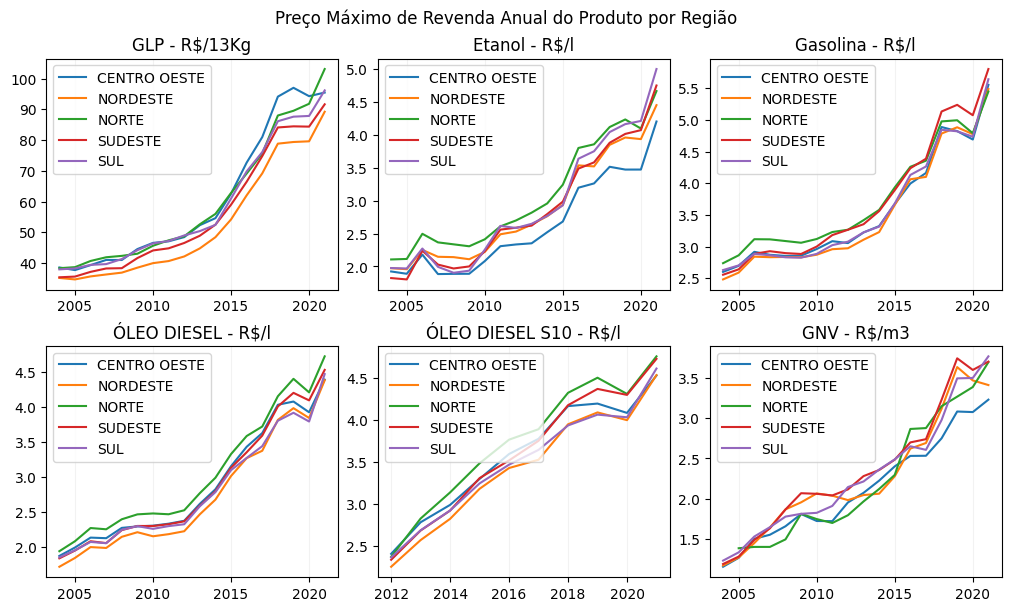

In [32]:
#Preço Máximo de Revenda Anual do Produto por Região
regioes=np.unique(df['REGIÃO'])

fig, axs = plt.subplots(2, 3, figsize=(10, 6), layout='constrained')
fig.suptitle('Preço Máximo de Revenda Anual do Produto por Região')

axs[0,0].plot(glp.groupby(['REGIÃO','ano_inicial'])['PREÇO MÁXIMO REVENDA'].mean().unstack(level=0), label=regioes)
axs[0,0].set_title('GLP - R$/13Kg')
axs[0,0].legend(loc='upper left')
axs[0,0].grid(axis='x', color='0.95')

axs[0, 1].plot(etanol.groupby(['REGIÃO','ano_inicial'])['PREÇO MÁXIMO REVENDA'].mean().unstack(level=0), label=regioes)
axs[0, 1].set_title('Etanol - R$/l')
axs[0, 1].legend(loc='upper left')
axs[0, 1].grid(axis='x', color='0.95')

axs[0, 2].plot(gasolina.groupby(['REGIÃO','ano_inicial'])['PREÇO MÁXIMO REVENDA'].mean().unstack(level=0), label=regioes)
axs[0, 2].set_title('Gasolina - R$/l')
axs[0, 2].legend(loc='upper left')
axs[0, 2].grid(axis='x', color='0.95')

axs[1, 0].plot(diesel.groupby(['REGIÃO','ano_inicial'])['PREÇO MÁXIMO REVENDA'].mean().unstack(level=0), label=regioes)
axs[1, 0].set_title('ÓLEO DIESEL - R$/l')
axs[1, 0].legend(loc='upper left')
axs[1, 0].grid(axis='x', color='0.95')

axs[1, 1].plot(diesels10.groupby(['REGIÃO','ano_inicial'])['PREÇO MÁXIMO REVENDA'].mean().unstack(level=0), label=regioes)
axs[1, 1].set_title('ÓLEO DIESEL S10 - R$/l')
axs[1, 1].legend(loc='upper left')
axs[1, 1].grid(axis='x', color='0.95')

axs[1, 2].plot(gnv.groupby(['REGIÃO','ano_inicial'])['PREÇO MÁXIMO REVENDA'].mean().unstack(level=0), label=regioes)
axs[1, 2].set_title('GNV - R$/m3')
axs[1, 2].legend(loc='upper left')
axs[1, 2].grid(axis='x', color='0.95')

In [33]:
#Mínima e Máxima Histórica

#Mínima
print(glp.groupby(['ano_inicial', 'ESTADO'])['PREÇO MÉDIO REVENDA'].mean().sort_values().head(1))
print(etanol.groupby(['ano_inicial', 'ESTADO'])['PREÇO MÉDIO REVENDA'].mean().sort_values().head(1))
print(gasolina.groupby(['ano_inicial', 'ESTADO'])['PREÇO MÉDIO REVENDA'].mean().sort_values().head(1))
print(diesel.groupby(['ano_inicial', 'ESTADO'])['PREÇO MÉDIO REVENDA'].mean().sort_values().head(1))
print(diesels10.groupby(['ano_inicial', 'ESTADO'])['PREÇO MÉDIO REVENDA'].mean().sort_values().head(1))
print(glp.groupby(['ano_inicial', 'ESTADO'])['PREÇO MÉDIO REVENDA'].mean().sort_values().head(1))

#Máximo
print(glp.groupby(['ano_inicial', 'ESTADO'])['PREÇO MÁXIMO REVENDA'].mean().sort_values().tail(1))
print(etanol.groupby(['ano_inicial', 'ESTADO'])['PREÇO MÁXIMO REVENDA'].mean().sort_values().tail(1))
print(gasolina.groupby(['ano_inicial', 'ESTADO'])['PREÇO MÉDIO REVENDA'].mean().sort_values().tail(1))
print(diesel.groupby(['ano_inicial', 'ESTADO'])['PREÇO MÉDIO REVENDA'].mean().sort_values().tail(1))
print(diesels10.groupby(['ano_inicial', 'ESTADO'])['PREÇO MÉDIO REVENDA'].mean().sort_values().tail(1))
print(glp.groupby(['ano_inicial', 'ESTADO'])['PREÇO MÉDIO REVENDA'].mean().sort_values().tail(1))

ano_inicial  ESTADO   
2005         SAO PAULO    28.60706
Name: PREÇO MÉDIO REVENDA, dtype: float64
ano_inicial  ESTADO   
2005         SAO PAULO    1.1825
Name: PREÇO MÉDIO REVENDA, dtype: float64
ano_inicial  ESTADO   
2004         SAO PAULO    2.153222
Name: PREÇO MÉDIO REVENDA, dtype: float64
ano_inicial  ESTADO 
2004         PARAIBA    1.542222
Name: PREÇO MÉDIO REVENDA, dtype: float64
ano_inicial  ESTADO
2012         BAHIA     2.13
Name: PREÇO MÉDIO REVENDA, dtype: float64
ano_inicial  ESTADO   
2005         SAO PAULO    28.60706
Name: PREÇO MÉDIO REVENDA, dtype: float64
ano_inicial  ESTADO     
2018         MATO GROSSO    115.980769
Name: PREÇO MÁXIMO REVENDA, dtype: float64
ano_inicial  ESTADO           
2021         RIO GRANDE DO SUL    5.754647
Name: PREÇO MÁXIMO REVENDA, dtype: float64
ano_inicial  ESTADO
2021         ACRE      5.793
Name: PREÇO MÉDIO REVENDA, dtype: float64
ano_inicial  ESTADO
2021         ACRE      5.231471
Name: PREÇO MÉDIO REVENDA, dtype: float64
ano_ini

C:\Users\manus\AppData\Local\Temp\ipykernel_14284\397947539.py:36: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


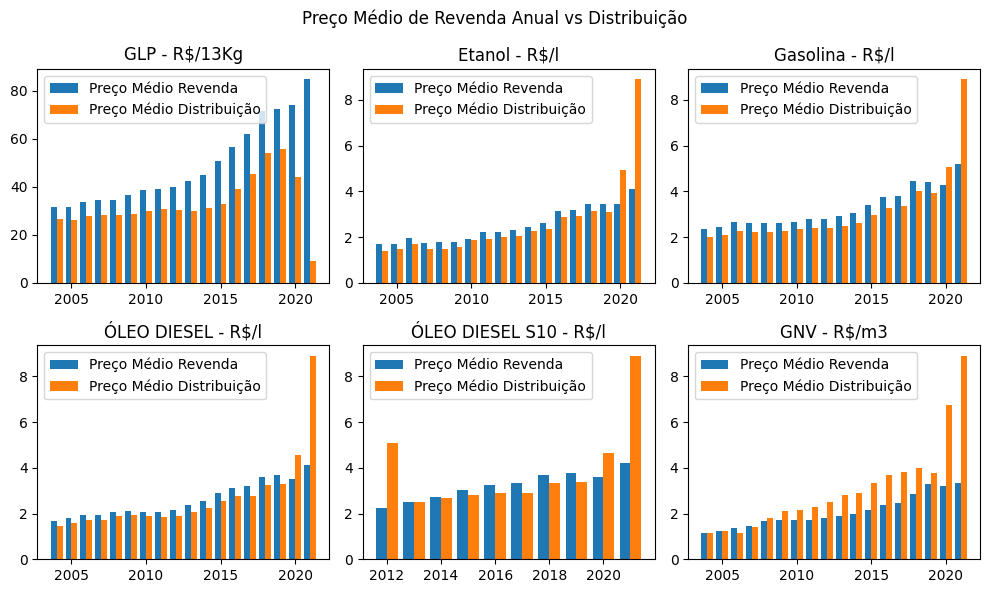

In [34]:
#Preço Médio de Revenda Anual vs Distribuição
fig, axs = plt.subplots(2, 3, figsize=(10, 6), layout='constrained')
fig.suptitle('Preço Médio de Revenda Anual vs Distribuição')

axs[0,0].bar(anos-0.2,glp.groupby('ano_inicial')['PREÇO MÉDIO REVENDA'].mean(),0.4,label = 'Preço Médio Revenda')
axs[0,0].bar(anos+0.2,glp.groupby('ano_inicial')['PREÇO MÉDIO DISTRIBUIÇÃO'].mean(),0.4, label= 'Preço Médio Distribuição')
axs[0,0].legend()
axs[0,0].set_title('GLP - R$/13Kg')

axs[0, 1].bar(anos-0.2,etanol.groupby('ano_inicial')['PREÇO MÉDIO REVENDA'].mean(),0.4,label = 'Preço Médio Revenda')
axs[0, 1].bar(anos+0.2,etanol.groupby('ano_inicial')['PREÇO MÉDIO DISTRIBUIÇÃO'].mean(),0.4, label= 'Preço Médio Distribuição')
axs[0, 1].legend()
axs[0, 1].set_title('Etanol - R$/l')

axs[0, 2].bar(anos-0.2,gasolina.groupby('ano_inicial')['PREÇO MÉDIO REVENDA'].mean(),0.4,label = 'Preço Médio Revenda')
axs[0, 2].bar(anos+0.2,gasolina.groupby('ano_inicial')['PREÇO MÉDIO DISTRIBUIÇÃO'].mean(),0.4, label= 'Preço Médio Distribuição')
axs[0, 2].legend()
axs[0, 2].set_title('Gasolina - R$/l')

axs[1, 0].bar(anos-0.2,diesel.groupby('ano_inicial')['PREÇO MÉDIO REVENDA'].mean(),0.4,label = 'Preço Médio Revenda')
axs[1, 0].bar(anos+0.2,diesel.groupby('ano_inicial')['PREÇO MÉDIO DISTRIBUIÇÃO'].mean(),0.4, label= 'Preço Médio Distribuição')
axs[1, 0].legend()
axs[1, 0].set_title('ÓLEO DIESEL - R$/l')

axs[1, 1].bar(anos_ds10-0.2,diesels10.groupby('ano_inicial')['PREÇO MÉDIO REVENDA'].mean(),0.4,label = 'Preço Médio Revenda')
axs[1, 1].bar(anos_ds10+0.2,diesels10.groupby('ano_inicial')['PREÇO MÉDIO DISTRIBUIÇÃO'].mean(),0.4, label= 'Preço Médio Distribuição')
axs[1, 1].legend()
axs[1, 1].set_title('ÓLEO DIESEL S10 - R$/l')

axs[1, 2].bar(anos-0.2,gnv.groupby('ano_inicial')['PREÇO MÉDIO REVENDA'].mean(),0.4,label = 'Preço Médio Revenda')
axs[1, 2].bar(anos+0.2,gnv.groupby('ano_inicial')['PREÇO MÉDIO DISTRIBUIÇÃO'].mean(),0.4, label= 'Preço Médio Distribuição')
axs[1, 2].legend()
axs[1, 2].set_title('GNV - R$/m3')


plt.tight_layout()
plt.show()